<a href="https://colab.research.google.com/github/ai-academy-ro/IBR_ML_Python/blob/main/7_0__Predicting_house_prices_based_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting house prices based on structured data and images**

# **1. Dataset description**

Number of Attributes: 4 textual attributes in addition to the visual attributes that can be extracted from the images.

Attribute Information:
- Number of bedrooms
- Number of bathrooms
- Area (i.e., square footage)
- Zip code

For more info and credits visit:\
https://github.com/emanhamed/Houses-dataset

## Model architecture

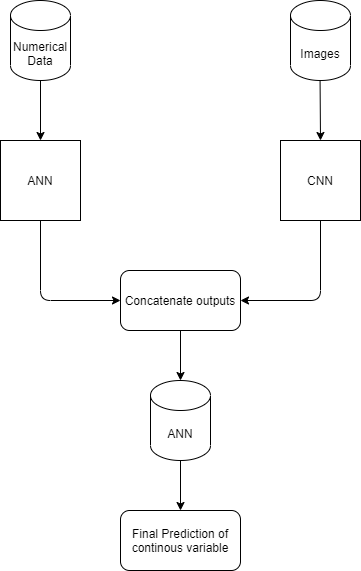

<a id="Libraries"></a> <br>
# **2. Libraries and data**

In [1]:
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Local data

In [3]:
!gdown https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
!unzip houses.zip

Downloading...
From (original): https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
From (redirected): https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj&confirm=t&uuid=8024b0d6-b3b2-4a17-ae38-c41b6bbdc55e
To: /content/houses.zip
100% 186M/186M [00:01<00:00, 173MB/s]
Archive:  houses.zip
  inflating: README.md               
   creating: data/
  inflating: data/49_bathroom.jpg    
  inflating: data/320_bedroom.jpg    
  inflating: data/300_kitchen.jpg    
  inflating: data/259_frontal.jpg    
  inflating: data/169_bedroom.jpg    
  inflating: data/8_kitchen.jpg      
  inflating: data/439_bedroom.jpg    
  inflating: data/419_kitchen.jpg    
  inflating: data/149_kitchen.jpg    
  inflating: data/15_frontal.jpg     
  inflating: data/172_frontal.jpg    
  inflating: data/422_frontal.jpg    
  inflating: data/194_bedroom.jpg    
  inflating: data/242_bedroom.jpg    
  inflating: data/262_kitchen.jpg    
  inflating: data/350_bedroom.jpg    
  inflating: data/2

In [4]:
filename= './data/HousesInfo.txt'
path = './data/'

In [5]:
header = ['bedrooms', 'bathrooms', 'area', 'zipcode', 'price']
df = pd.read_csv(filename, header=None, delimiter=' ', names=header)

<a id="Known"></a> <br>
# **3. First look at the data**

In [6]:
#Searching for null values,data types and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   535 non-null    int64  
 1   bathrooms  535 non-null    float64
 2   area       535 non-null    int64  
 3   zipcode    535 non-null    int64  
 4   price      535 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 21.0 KB


In [7]:
#Looking at unique values
df.nunique()

bedrooms       9
bathrooms     14
area         435
zipcode       49
price        369
dtype: int64

In [8]:
#Looking at a data sample
df.head()

bedrooms  bathrooms  area  zipcode   price
0         4       4.00  4053    85255  869500
1         4       3.00  3343    36372  865200
2         3       4.00  3923    85266  889000
3         5       5.00  4022    85262  910000
4         3       4.00  4116    85266  971226

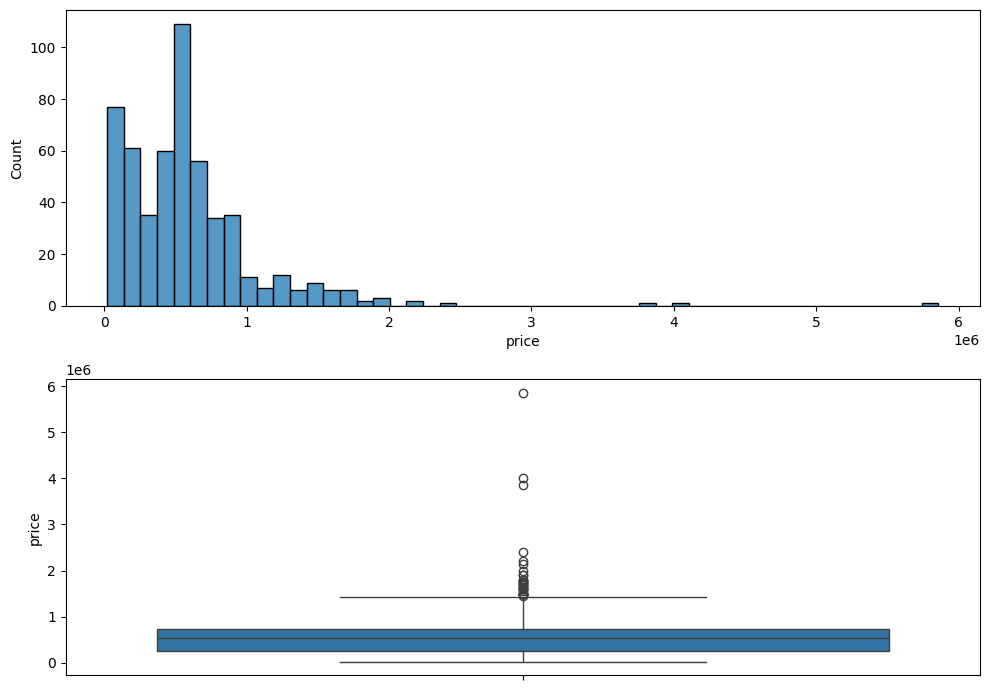

In [9]:
# visualizing target (prices) and identify outliers
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

In [10]:
df = df[df['price']<1500000]

# **4. Feature Engineering** <a id="Feature Engineering"></a> <br>

## Null treatement

In [11]:
# Null treatement

## Treatement of Categorical variables

In [12]:
df['bedrooms'].value_counts()

bedrooms
3     175
4     133
2     123
5      58
6      10
1       5
7       3
8       2
10      1
Name: count, dtype: int64

In [13]:
df['bathrooms'].value_counts()

bathrooms
2.00    215
3.00     93
2.50     65
4.00     39
3.50     29
1.00     24
5.00     14
1.50     14
4.50     11
6.00      3
5.50      1
7.00      1
3.25      1
Name: count, dtype: int64

In [14]:
# round bathrooms to full integer values
df['bathrooms'] = df['bathrooms'].round(0)

In [15]:
# Put all zipcodes with less than 4 frequency in Other category
zip_counts = df['zipcode'].value_counts()
df['zip_code'] = df['zipcode'].apply(lambda z: str(z) if zip_counts[z] >= 4 else 'Other')

# Display the resulting value counts of the 'zip_code' column
df['zip_code'].value_counts()

zip_code
92276    100
93510     59
93446     52
92880     49
94501     40
Other     36
91901     32
94531     22
92677     22
96019     11
92021     11
81524     11
85266     10
85255     10
92802      9
95220      8
62234      7
93111      7
85262      6
62214      4
98021      4
Name: count, dtype: int64

In [16]:
y = df['price']   # Separate target variable
df.drop(['price', 'zipcode'], axis = 1, inplace=True)  # delete unecessary columns

In [17]:
categ = list(df.select_dtypes(['object']).columns) + list(df.select_dtypes(['category']).columns)
print(categ)

['zip_code']


In [18]:
# One hot encoder for Categorical Variables
print('Data frame shape before Categorical Values encoding: ',df.shape)
df = pd.get_dummies(data=df, columns=categ, dtype=int)
print('Data frame shape after Categorical Values encoding: ',df.shape)


Data frame shape before Categorical Values encoding:  (510, 4)
Data frame shape after Categorical Values encoding:  (510, 24)


In [19]:
df.head()

bedrooms  bathrooms  area  zip_code_62214  zip_code_62234  zip_code_81524  \
0         4       4.00  4053               0               0               0   
1         4       3.00  3343               0               0               0   
2         3       4.00  3923               0               0               0   
3         5       5.00  4022               0               0               0   
4         3       4.00  4116               0               0               0   

   zip_code_85255  zip_code_85262  zip_code_85266  zip_code_91901  ...  \
0               1               0               0               0  ...   
1               0               0               0               0  ...   
2               0               0               1               0  ...   
3               0               1               0               0  ...   
4               0               0               1               0  ...   

   zip_code_92880  zip_code_93111  zip_code_93446  zip_code_93510  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   zip_code_94501  zip_code_94531  zip_code_95220  zip_code_96019  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   zip_code_98021  zip_code_Other  
0               0               0  
1               0               1  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 24 columns]

## Looking at the correlation of the data

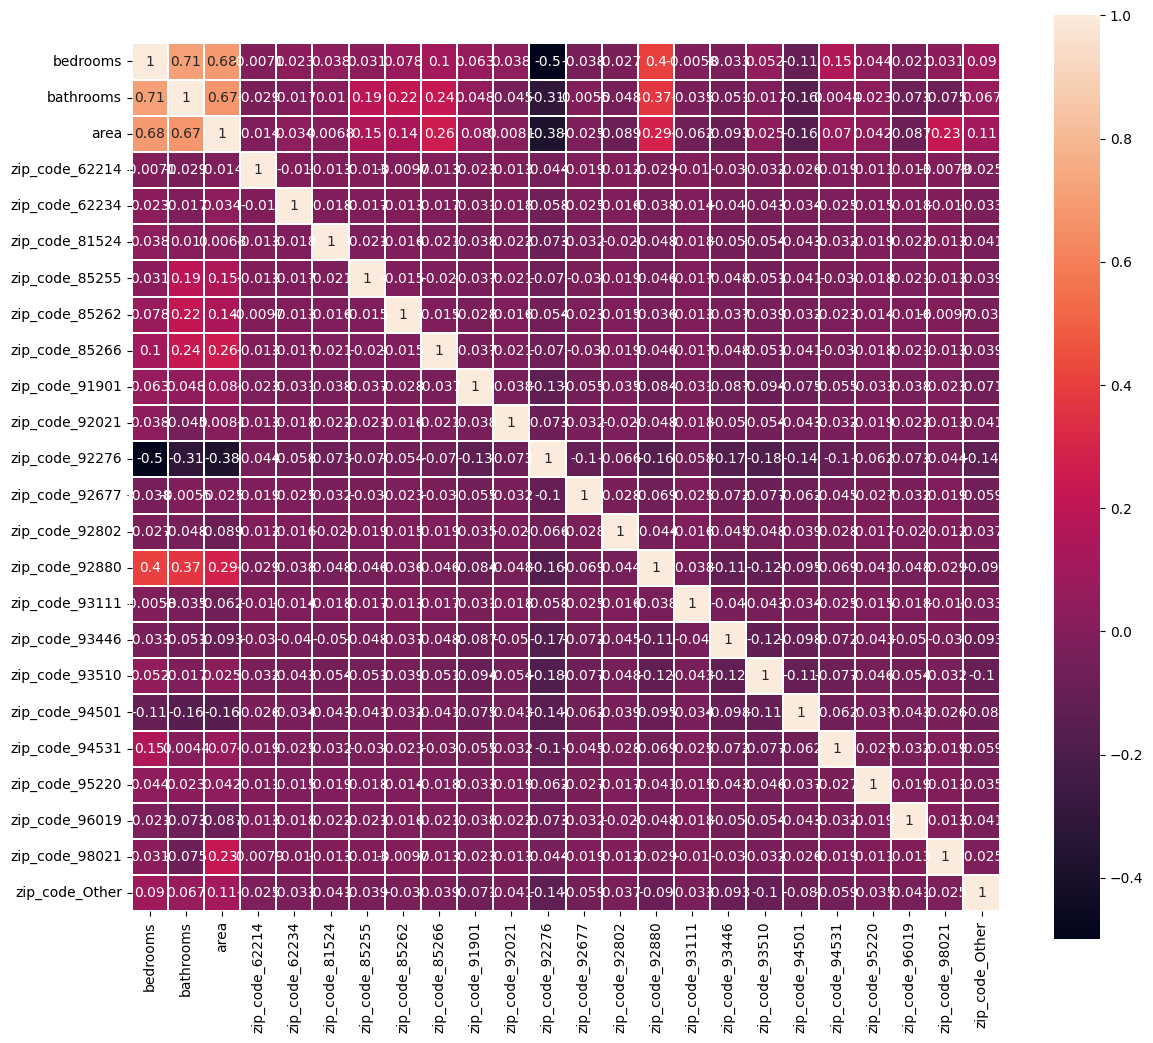

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,  linecolor='white', annot=True)
plt.show()

In [21]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(df, 0.9)
print(corr_features)

for column in corr_features:
  df.drop(column, axis=1,inplace=True)

set()


# **5. Train/Test split and Scaling** <a id="Train/Test split and Scaling"></a> <br>


## Import libraries

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## Prepare and split Dataset into Train and Test

In [24]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=42)

## Scale input for distance-based models

In [25]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [26]:
# normalize target
max_price = y_train.max()
y_train = y_train/ max_price
y_test = y_test / max_price

# **6. Implement baseline model** <a id="Implement model"></a> <br>

### Import libraries


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LayerNormalization, Input

### Define model evaluation function


In [28]:
def model_eval(y_test,y_pred):
  print("Test mean           : {:.2f}".format(np.mean(y_test)))
  print("Price Std (baseline): {:.2f}".format(np.std(y_test)))
  print("Test RMSE           : {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
  print("Test MAE            : {:.2f}".format(mean_absolute_error(y_test,y_pred)))
  print("R² score            : {:.4f}".format(r2_score(y_test,y_pred)))

### Define, compile and train ANN model


In [29]:
#%tensorflow_version 2.x
num_input = Input(shape=(X_train_scaled.shape[1],))
num_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="linear")
])

In [30]:
num_model.compile(loss='mse',
              optimizer= 'adam',
              metrics=['mae'])

In [31]:
num_model.fit(X_train_scaled, y_train,
          batch_size = 16, epochs = 100, verbose=1,
          validation_data=(X_test_scaled, y_test))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.1508 - mae: 0.3096 - val_loss: 0.0235 - val_mae: 0.1259
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0367 - mae: 0.1474 - val_loss: 0.0108 - val_mae: 0.0803
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 - mae: 0.1121 - val_loss: 0.0083 - val_mae: 0.0628
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - mae: 0.0943 - val_loss: 0.0075 - val_mae: 0.0564
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 - mae: 0.0909 - val_loss: 0.0070 - val_mae: 0.0533
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - mae: 0.0793 - val_loss: 0.0075 - val_mae: 0.0540
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 - mae: 0.0782 - val_loss: 0.0072 - val_mae: 0.0539
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143 - mae: 0.0825 - val_loss: 0.0077 - val_mae: 0.0550
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.01

### Predict and evaluate ANN model

In [32]:
y_pred = num_model.predict(X_test_scaled)
y_pred_orig = y_pred * max_price
y_test_orig = y_test * max_price

model_eval(y_test_orig,y_pred_orig)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
Test mean           : 499839.20
Price Std (baseline): 262786.56
Test RMSE           : 101002.65
Test MAE            : 68948.52
R² score            : 0.8523


In [33]:
# Look at some examples in validation sample
df_out = pd.DataFrame(y_test_orig)
df_out['baseline_pred'] = pd.DataFrame(y_pred_orig, index=df_out.index)
df_out.head(10)

price  baseline_pred
505 525000.00      465203.68
473 310000.00      464562.99
500 599900.00      603234.62
458 575000.00      511238.26
390 129900.00      107966.71
62  249900.00      603077.17
344  99900.00       99273.03
83  699999.00      704460.27
529 495000.00      452839.24
369  84900.00      107966.71

<Figure size 1000x500 with 0 Axes>

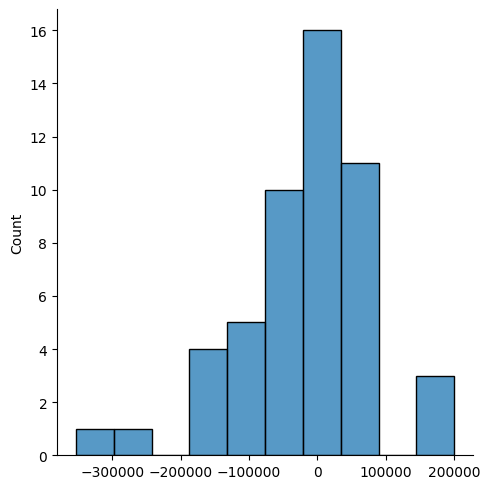

In [34]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (df_out['price'] - df_out['baseline_pred'])
sns.displot(residuals)

# **7. Implement image model** <a id="Implement model"></a> <br>

### Import libraries

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout, Flatten, Activation, Conv2D, BatchNormalization, MaxPooling2D

### Retreive image data

In [36]:
#!gdown https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
#!unzip houses.zip

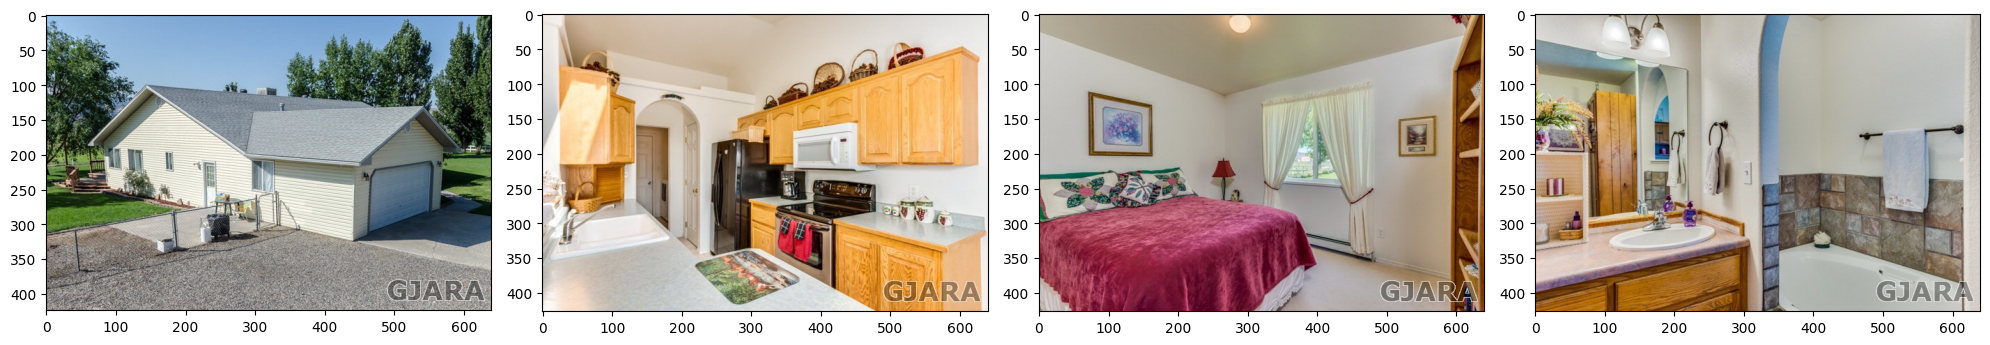

In [37]:
id = 45
types = ['frontal','kitchen','bedroom','bathroom']

f, ax = plt.subplots(1, 4, figsize=(20,20))
for pos, type in zip(range(0,4),types):
  ax[pos].imshow(io.imread('data/'+str(id)+'_'+type+'.jpg'))
plt.tight_layout()
plt.show()

### Process image data

In [38]:
# For each property, concatenate the images from the four categories, based on the prices aligned with the structured data
# Images to be scaled to 50x50x3 (width, height, channels)

images = []
new_size = (100,100)
types = ['frontal','kitchen','bedroom','bathroom']
for i in df.index:
  for type in types:
    img = io.imread('data/'+str(i+1)+'_'+type+'.jpg')
    img = cv2.resize(img, new_size)
    if type=='frontal':
      image = img
    else:
      image =  np.concatenate((image, img), axis=1)
  images.append(image)

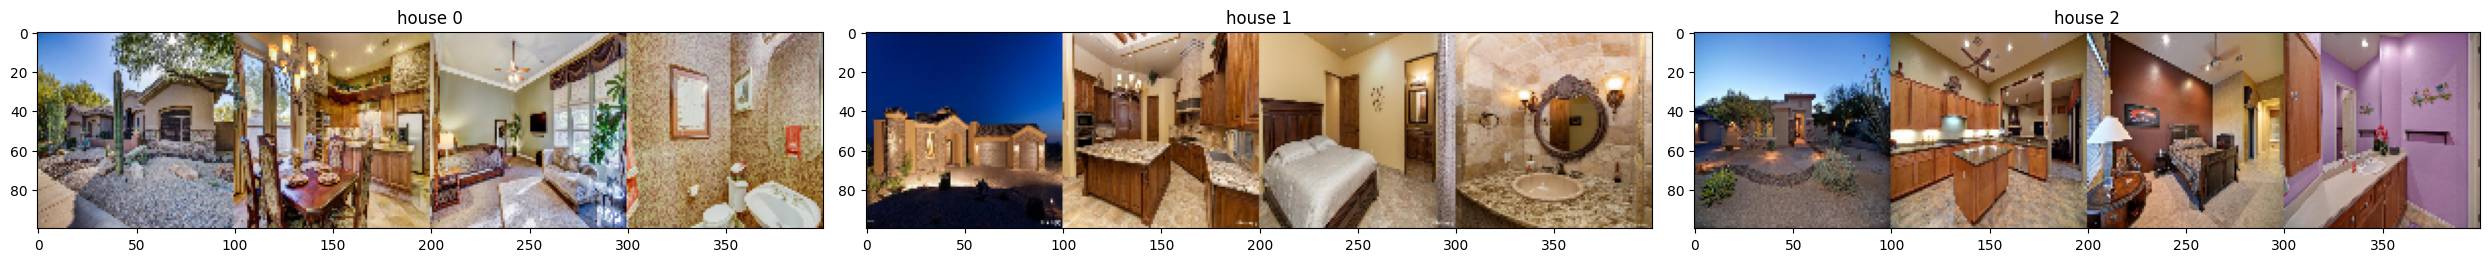

In [39]:
# View the results
f, ax = plt.subplots(1, 3, figsize=(25,25))

for i in range(3):
  ax[i].imshow(images[i])
  ax[i].set_title('house {}'.format(i))
plt.tight_layout()
plt.show()

In [40]:
# other concatenation options
images = []
new_size = (100,100)
types = ['frontal','kitchen','bedroom','bathroom']
for i in df.index:
  grid = np.zeros((200, 200, 3), dtype="uint8")
  for type in types:
    img = io.imread('data/'+str(i+1)+'_'+type+'.jpg')
    img = cv2.resize(img, new_size)
    if type=='frontal':
      grid[0:100, 0:100] = img
    if type=='kitchen':
      grid[0:100, 100:200] = img
    if type=='bedroom':
      grid[100:200, 100:200] = img
    if type=='bathroom':
      grid[100:200, 0:100] = img
  images.append(grid)

### Train/test split image data

In [41]:
X_img = pd.Series(images)
y_img = y

X_train, X_test, y_train, y_test = train_test_split(X_img, y_img, test_size=0.1, random_state=42)

In [42]:
# normalize inputs
X_train_image = np.array(X_train.tolist()).astype('float32') / 255
X_test_image = np.array(X_test.tolist()).astype('float32') / 255

print (X_train_image.shape)

(459, 200, 200, 3)


In [43]:
# normalize target
max_price = y_train.max()
y_train = y_train/ max_price
y_test = y_test / max_price

### Define, compile and train CNN model


In [44]:
#%tensorflow_version 2.x
img_input = Input(shape=(X_train_image.shape[1], X_train_image.shape[2], X_train_image.shape[3]))
img_model = Sequential([
    Conv2D(32, (1, 1), padding="same", input_shape=(X_train_image.shape[1], X_train_image.shape[2], X_train_image.shape[3]), activation="relu"),
    BatchNormalization(axis=-1),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (1, 1), padding="same", activation="relu"),
    BatchNormalization(axis=-1),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (1, 1), padding="same", activation="relu"),
    BatchNormalization(axis=-1),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    BatchNormalization(axis=-1),
    Dropout(0.8),
    Dense(32, activation="relu"),
    BatchNormalization(axis=-1),
    Dropout(0.1),
    Dense(8, activation="relu"),
    Dense(1, activation="linear")
])

In [45]:
img_model.compile(loss='mse',
              optimizer= Adam(learning_rate=1e-2),
              metrics=['mae'])

img_checkpointer = ModelCheckpoint(filepath="img_weights.keras", verbose=1, save_best_only=True)

In [46]:
img_model.fit(X_train_image, y_train,
          batch_size = 8, epochs = 100, verbose=1,
          validation_data=(X_test_image, y_test),
          callbacks=[img_checkpointer])

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.5741 - mae: 0.8487
Epoch 1: val_loss improved from inf to 7.66169, saving model to img_weights.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - loss: 1.5596 - mae: 0.8441 - val_loss: 7.6617 - val_mae: 2.6484
Epoch 2/100
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1496 - mae: 0.2976
Epoch 2: val_loss improved from 7.66169 to 4.45689, saving model to img_weights.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.1488 - mae: 0.2968 - val_loss: 4.4569 - val_mae: 2.0663
Epoch 3/100
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0802 - mae: 0.2254
Epoch 3: val_loss improved from 4.45689 to 4.44635, saving model to img_weights.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0803 - mae: 0.2252 - val_loss: 4.4463 - val_mae: 2.0530
Epoch 4/100
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0667 - mae: 0.2068
Epoch 4: val_loss improved from 4.44635 to 2.09732, saving model to img_weights.keras
58/58 ━━━━━━━━━━━━

### Predict and evaluate CNN model

In [47]:
img_model.load_weights("img_weights.keras")

y_pred = img_model.predict(X_test_image)
y_pred_orig = y_pred * max_price
y_test_orig = y_test * max_price

model_eval(y_test_orig,y_pred_orig)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 870ms/step
Test mean           : 499839.20
Price Std (baseline): 262786.56
Test RMSE           : 196927.69
Test MAE            : 168427.09
R² score            : 0.4384


In [48]:
# Look at some examples in validation sample
df_out = pd.DataFrame(y_test_orig)
df_out['cnn_pred'] = pd.DataFrame(y_pred_orig, index=df_out.index)
df_out.head(10)

price  cnn_pred
505 525000.00 651697.41
473 310000.00 518875.40
500 599900.00 632494.59
458 575000.00 769078.13
390 129900.00 336100.17
62  249900.00 435590.86
344  99900.00 322861.66
83  699999.00 712598.09
529 495000.00 614048.16
369  84900.00 256744.50

<Figure size 1000x500 with 0 Axes>

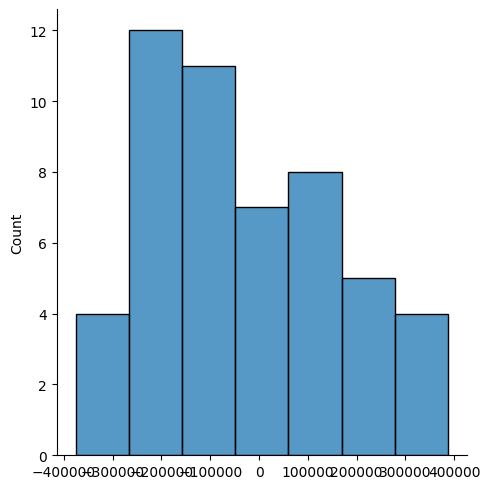

In [49]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (df_out['price'] - df_out['cnn_pred'])
sns.displot(residuals)

# **8. Implement mixed model** <a id="Implement mixed model"></a> <br>

### Import libraries


In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers import concatenate

### Define and re-train mixed model


In [51]:
# Define combined model
for l in num_model.layers:
    l.trainable = False

for l in img_model.layers:
    l.trainable = False

num_output = num_model(num_input)  # Explicit call to num_model
img_output = img_model(img_input)  # Explicit call to img_model

merged = concatenate([num_output, img_output])
dense = Dense(8, activation="relu")(merged)
output = Dense(1, activation="linear")(dense)

mixed_model = Model(inputs=[num_input, img_input], outputs=[output])
print(mixed_model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 24)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 1)              │          5,009 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 1)              │      1,287,633 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 2)              │              0 │ sequential[0][0],      │
│                           │                        │                │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 8)              │             24 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │              9 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,292,675 (4.93 MB)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 1,292,642 (4.93 MB)

None


In [52]:
mixed_checkpointer = ModelCheckpoint(filepath="mixed_weights.keras", verbose=1, save_best_only=True)

mixed_model.compile(loss='mse',
              optimizer= Adam(learning_rate=1e-2),
              metrics=['mae'])

In [53]:
mixed_model.fit([X_train_scaled, X_train_image], y_train,
          batch_size = 8, epochs = 100, verbose=1,
          validation_data=([X_test_scaled, X_test_image], y_test),
          callbacks=[mixed_checkpointer])

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0000e+00 - mae: 0.2844
Epoch 1: val_loss improved from inf to 0.00000, saving model to mixed_weights.keras
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0000e+00 - mae: 0.2828 - val_loss: 0.0000e+00 - val_mae: 0.0664
Epoch 2/100
51/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0000e+00 - mae: 0.0769
Epoch 2: val_loss did not improve from 0.00000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0000e+00 - mae: 0.0761 - val_loss: 0.0000e+00 - val_mae: 0.0443
Epoch 3/100
50/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0000e+00 - mae: 0.0640
Epoch 3: val_loss did not improve from 0.00000
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0000e+00 - mae: 0.0638 - val_loss: 0.0000e+00 - val_mae: 0.0457
Epoch 4/100
51/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0000e+00 - mae: 0.0629
Epoch 4: val_loss did not improve from 0.00000
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0000e+00 - mae: 0.0629 - val_loss: 0.0000e+00 - v

### Predict and evaluate mixed model

In [54]:
mixed_model.load_weights("mixed_weights.keras")
y_pred = mixed_model.predict([X_test_scaled, X_test_image])
y_pred_orig = y_pred * max_price
y_test_orig = y_test * max_price

model_eval(y_test_orig,y_pred_orig)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step
Test mean           : 499839.20
Price Std (baseline): 262786.56
Test RMSE           : 134904.14
Test MAE            : 99627.32
R² score            : 0.7365


In [55]:
# Look at some examples in validation sample
df_out = pd.DataFrame(y_test_orig)
df_out['final_pred'] = pd.DataFrame(y_pred_orig, index=df_out.index)
df_out.head(10)

price  final_pred
505 525000.00   533660.13
473 310000.00   516012.24
500 599900.00   598140.79
458 575000.00   562645.22
390 129900.00   267286.33
62  249900.00   582329.81
344  99900.00   258280.95
83  699999.00   640934.25
529 495000.00   521255.32
369  84900.00   246431.05

<Figure size 1000x500 with 0 Axes>

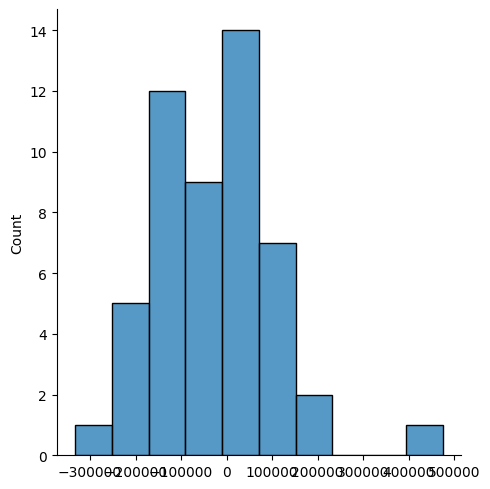

In [56]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (df_out['price'] - df_out['final_pred'])
sns.displot(residuals)

In [59]:
indexes = df_out.index
print(indexes)

Index([505, 473, 500, 458, 390,  62, 344,  83, 529, 369, 439, 239, 124, 271,
       188, 100, 347, 297, 364,  77, 530,  12, 272, 432, 447, 475, 187,  37,
       472,  97, 404, 139, 386,  80, 229, 351, 391, 108, 237, 166, 244, 423,
        70,   2, 465, 362,  89, 306, 228, 496, 196],
      dtype='int64')


Actual price:     499500.0
Predicted price:  496981.0


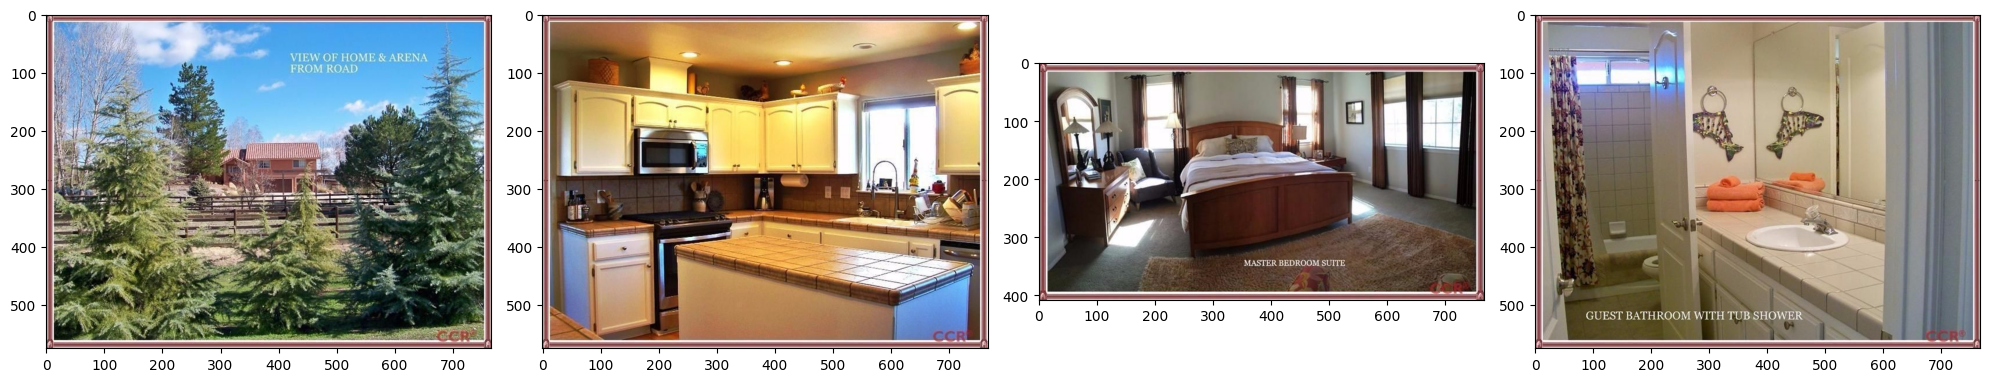

In [57]:
id = 475

print('Actual price:    ', df_out['price'].loc[id].round())
print('Predicted price: ', df_out['final_pred'].loc[id].round())
print('============================')

types = ['frontal','kitchen','bedroom','bathroom']
f, ax = plt.subplots(1, 4, figsize=(20,20))
for pos, type in zip(range(0,4),types):
  ax[pos].imshow(io.imread('data/'+str(id)+'_'+type+'.jpg'))
plt.tight_layout()
plt.show()

Actual price:     96500.0
Predicted price:  261499.0


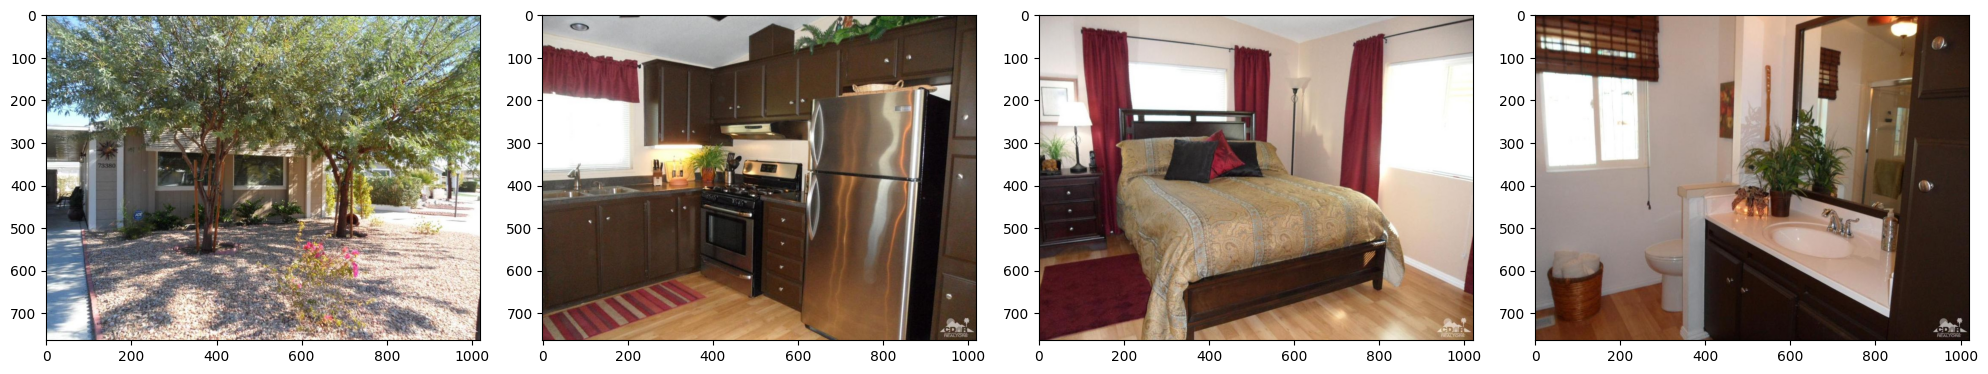

In [58]:
id = 364

print('Actual price:    ', df_out['price'].loc[id].round())
print('Predicted price: ', df_out['final_pred'].loc[id].round())
print('============================')

types = ['frontal','kitchen','bedroom','bathroom']
f, ax = plt.subplots(1, 4, figsize=(20,20))
for pos, type in zip(range(0,4),types):
  ax[pos].imshow(io.imread('data/'+str(id)+'_'+type+'.jpg'))
plt.tight_layout()
plt.show()